# Example: Redshift-space Galaxy Power Spectrum

In [15]:
from molino import GalaxyCatalog
from pyspectrum import pyspectrum as pySpec

In [18]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# read Molino galaxy catalogs
Lets read in 3 N-body relations and 2 HOD realizations at the `Mnu_p` cosmology, *first in real-space*

In [25]:
nbodys = range(3)
hods = range(2)

In [8]:
GalaxyCatalog?

In [11]:
xyzs = GalaxyCatalog(
    'Mnu_p', # specify the cosmological and HOD parameters
    i_nbody=nbodys, # n-body realizations
    i_hod=hods, # HOD realizations
    apply_rsd=False # don't apply HOD
)

In [12]:
print(len(xyzs))
print(xyzs[0].shape)

6
(162167, 3)


## Now lets measure their power spectrum using the `pySpectrum` package

In [13]:
pks = [] 
for xyz in xyzs: 
    pks.append(pySpec.Pk_periodic(xyz.T, Lbox=1000., Ngrid=360, silent=False))

------------------
162167 positions in 1000 box
nbar = 0.000162
--- calculating the FFT ---
162167 positions
positions assigned to grid
position grid FFTed
fcomb complete
--- correcting for shotnoise ---
------------------
162863 positions in 1000 box
nbar = 0.000163
--- calculating the FFT ---
162863 positions
positions assigned to grid
position grid FFTed
fcomb complete
--- correcting for shotnoise ---
------------------
161726 positions in 1000 box
nbar = 0.000162
--- calculating the FFT ---
161726 positions
positions assigned to grid
position grid FFTed
fcomb complete
--- correcting for shotnoise ---
------------------
162407 positions in 1000 box
nbar = 0.000162
--- calculating the FFT ---
162407 positions
positions assigned to grid
position grid FFTed
fcomb complete
--- correcting for shotnoise ---
------------------
162480 positions in 1000 box
nbar = 0.000162
--- calculating the FFT ---
162480 positions
positions assigned to grid
position grid FFTed
fcomb complete
--- correctin

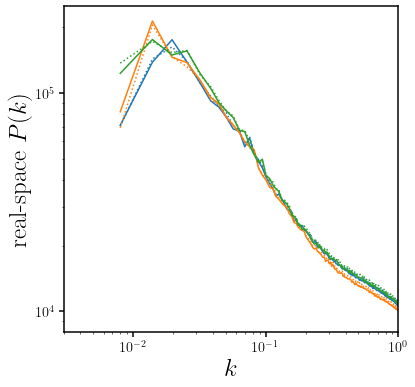

In [19]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for i_nbody in range(len(nbodys)): 
    for i_hod in range(len(hods)): 
        _pk = pks[2*i_nbody+i_hod]
        sub.plot(_pk['k'], _pk['p0k'], c='C%i' % i_nbody, ls=['-', ':'][i_hod])
sub.set_ylabel('real-space $P(k)$', fontsize=25) 
sub.set_yscale('log') 
sub.set_xlabel('$k$', fontsize=25) 
sub.set_xlim([3e-3, 1.]) 
sub.set_xscale('log') 

# now in redshift-space
RSD applied along the `z`-axis

In [20]:
xyzs = GalaxyCatalog(
    'Mnu_p', 
    i_nbody=nbodys, 
    i_hod=hods, 
    apply_rsd='z' # RSD along the 'z' direction (you can also put 'x' and 'y')
)

In [23]:
pks = [] 
for xyz in xyzs: 
    pks.append(pySpec.Pk_periodic_rsd(xyz.T, Lbox=1000., Ngrid=360, silent=True))

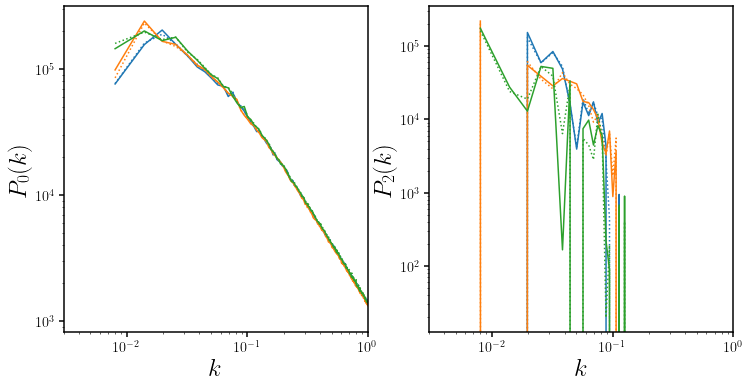

In [26]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
for i_nbody in range(len(nbodys)): 
    for i_hod in range(len(hods)): 
        _pk = pks[2*i_nbody+i_hod]
        sub.plot(_pk['k'], _pk['p0k'], c='C%i' % i_nbody, ls=['-', ':'][i_hod])
sub.set_ylabel('$P_0(k)$', fontsize=25) 
sub.set_yscale('log') 
sub.set_xlabel('$k$', fontsize=25) 
sub.set_xlim([3e-3, 1.]) 
sub.set_xscale('log') 

sub = fig.add_subplot(122)
for i_nbody in range(len(nbodys)): 
    for i_hod in range(len(hods)): 
        _pk = pks[2*i_nbody+i_hod]
        sub.plot(_pk['k'], _pk['p2k'], c='C%i' % i_nbody, ls=['-', ':'][i_hod])
sub.set_ylabel('$P_2(k)$', fontsize=25) 
sub.set_yscale('log') 
sub.set_xlabel('$k$', fontsize=25) 
sub.set_xlim([3e-3, 1.]) 
sub.set_xscale('log') 